# Analise de dados loja Ice, projeto integrado 1

Buscando identificar padrões de jogos de sucesso

### Bibiliotecas

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Carregando dados

In [27]:
df = pd.read_csv('datasets/games.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### preparando os dados

In [28]:
'''
c_name=df.columns
c_name = [name.lower() for name in c_name]
df.columns = c_name
df.columns
'''
df.columns = [name.lower() for name in df.columns]
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [29]:
#converte a coluna user_score em float
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')

#converte todas as colunas object em string
tb_changed = df.select_dtypes(include='object').columns
df[tb_changed] = df[tb_changed].astype('string')

In [30]:
print(df.duplicated().sum())

0


In [31]:
#criando coluna total_sales com a soma de todas as vendas (na,eu,jp)
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']
df['total_sales']

0        74.09
1        39.47
2        32.23
3        29.82
4        30.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16715, dtype: float64

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Vendas totais calculadas.

</div>


In [32]:
df['user_score'] = df['user_score'].fillna(df['user_score'].mean())

### Analise

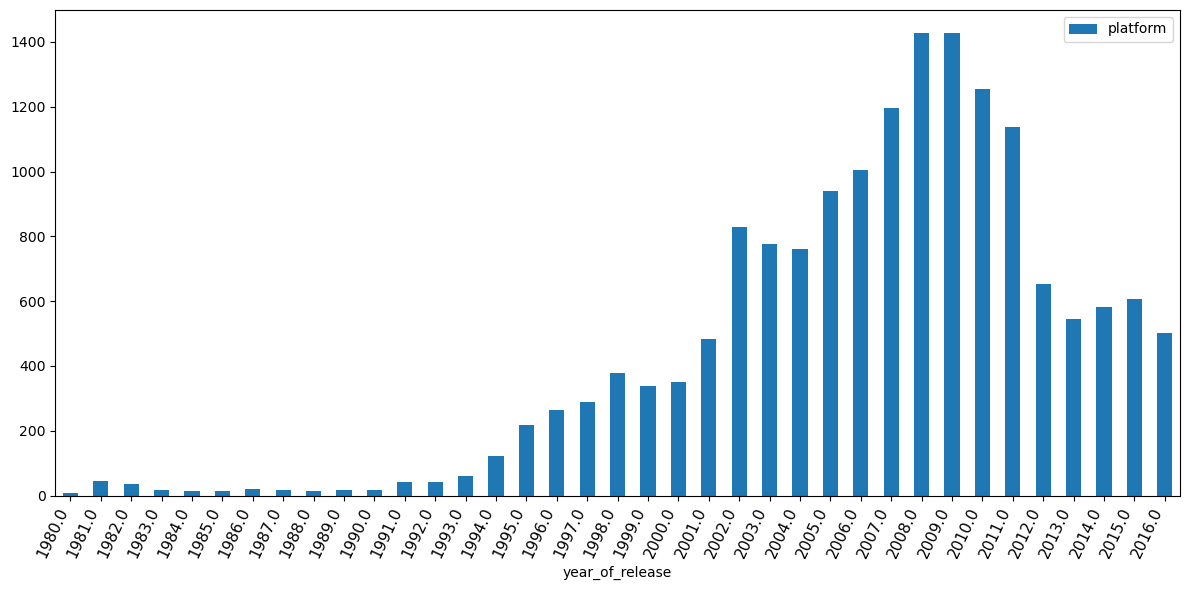

In [33]:

plt.figure(figsize=(12, 6))  # Aumenta o tamanho da figura para ajustar o espaçamento
ax = df[['platform', 'year_of_release']].groupby('year_of_release').count().plot(kind='bar', ax=plt.gca())

# Ajusta o espaçamento entre os pontos do eixo X
ax.set_xticks(ax.get_xticks())  # Define a posição dos ticks no eixo X
ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=65, fontsize=11)  # Ajusta a rotação e o alinhamento dos rótulos

plt.tight_layout()

plt.show()

In [34]:
#filtra as 5 plataformas com mais vendas ao longo dos anos
top5 = df[['total_sales','platform']].groupby('platform').sum().sort_values(by='total_sales',ascending=False).head(5)
top5_plat=top5.index.to_numpy()

print(top5)



          total_sales
platform             
PS2           1062.33
X360           885.66
Wii            828.44
PS3            803.97
DS             746.86


   platform  year_of_release  total_sales
0        DS           1985.0         0.02
1        DS           2004.0        15.91
2        DS           2005.0       119.34
3        DS           2006.0       111.64
4        DS           2007.0       135.85
5        DS           2008.0       134.37
6        DS           2009.0       110.99
7        DS           2010.0        79.48
8        DS           2011.0        24.30
9        DS           2012.0        10.42
10       DS           2013.0         1.42
11      PS2           2000.0        35.59
12      PS2           2001.0       149.65
13      PS2           2002.0       183.66
14      PS2           2003.0       163.62
15      PS2           2004.0       171.96
16      PS2           2005.0       141.51
17      PS2           2006.0        89.18
18      PS2           2007.0        52.30
19      PS2           2008.0        34.59
20      PS2           2009.0        16.24
21      PS2           2010.0         4.44
22      PS2           2011.0      

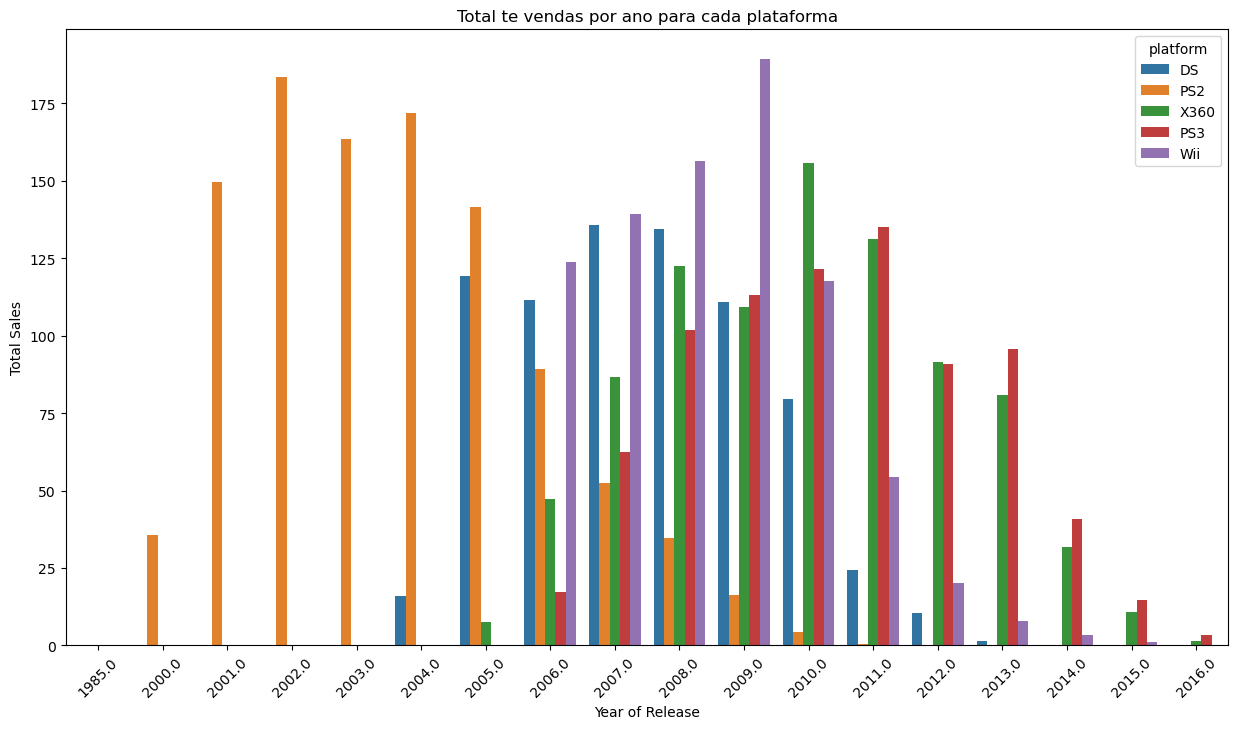

In [35]:
#selecionando apenas o top5 em vendas
df_filtered = df[df['platform'].isin(top5_plat)]
df_grouped = df_filtered.groupby(['platform', 'year_of_release']).sum().reset_index()

#organizando exibição
df_grouped_sorted = df_grouped.sort_values(by=['platform', 'year_of_release'], ascending=[True, True])

print(df_grouped_sorted[['platform','year_of_release','total_sales']])

# tamanho do gráfico
plt.figure(figsize=(15, 8))

# Gráfico de dispersão para variação de total_sales por platform e year_of_release
sns.barplot(data=df_grouped_sorted, x='year_of_release', y='total_sales',hue='platform')

plt.xticks(rotation=45)
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.title('Total te vendas por ano para cada plataforma')

plt.show()

Das 5 plataformas selecionadas DS e PS2 não tem mais vendas, sendo que DS teve vendas por 11 anos e o PS2 po 12anos
As demais plataformas apresentam vendas ainda ate 2016

Vamos utilizar os dados posteriores a 2010 (2011-2016) por demonstrarem melhor a realidade atual uma vez que as vendas dos jogos é afetado com lançamento de novas plataformas, o que torna plataformas muito antigas irrelevantes

In [36]:
# Filtra o DataFrame para incluir apenas as linhas onde 'year_of_release' é maior que 2010
df_above = df[df['year_of_release'] > 2010]

# Filtra as 5 plataformas com mais vendas após 2010
top5_att = df_above[['total_sales', 'platform']].groupby('platform').sum().sort_values(by='total_sales', ascending=False).head(5)
top5_plat_att = top5_att.index.to_numpy()

print(top5_plat_att)

# Selecionando apenas o top 5 em vendas depois de 2010
df_filtered = df_above[df_above['platform'].isin(top5_plat_att)]

# Agrupa por 'platform' e 'year_of_release' e calcula as vendas totais
df_grouped = df_filtered.groupby(['platform', 'year_of_release']).sum().reset_index()

# Organiza a exibição por 'platform' e 'year_of_release'
df_grouped_sorted = df_grouped.sort_values(by=['platform', 'year_of_release'], ascending=[True, True])

print(df_grouped_sorted[['platform', 'year_of_release', 'total_sales']])

['PS3' 'X360' 'PS4' '3DS' 'XOne']
   platform  year_of_release  total_sales
0       3DS           2011.0        58.80
1       3DS           2012.0        48.77
2       3DS           2013.0        53.97
3       3DS           2014.0        41.75
4       3DS           2015.0        26.75
5       3DS           2016.0        14.50
6       PS3           2011.0       135.22
7       PS3           2012.0        90.87
8       PS3           2013.0        95.85
9       PS3           2014.0        40.88
10      PS3           2015.0        14.70
11      PS3           2016.0         3.23
12      PS4           2013.0        22.12
13      PS4           2014.0        84.22
14      PS4           2015.0       100.44
15      PS4           2016.0        59.01
16     X360           2011.0       131.11
17     X360           2012.0        91.45
18     X360           2013.0        80.82
19     X360           2014.0        31.61
20     X360           2015.0        10.86
21     X360           2016.0         1.40


Plataformas ques estão liderando as vendas (2010-2016) PS3, X360, PS4, 3DS, XOne

As plataformas x360, PS3 e 3DS apresentam uma queda ao longo dos anos possivelmento por estarem se tornando desatualizados

No entanto as vendas tem aumentado para XOne e PS4, que mostram um historico de vendas muito bom nos modelos anteriores (ps2,ps3 e x360). Estas se mostram com um grande potencial para lucro

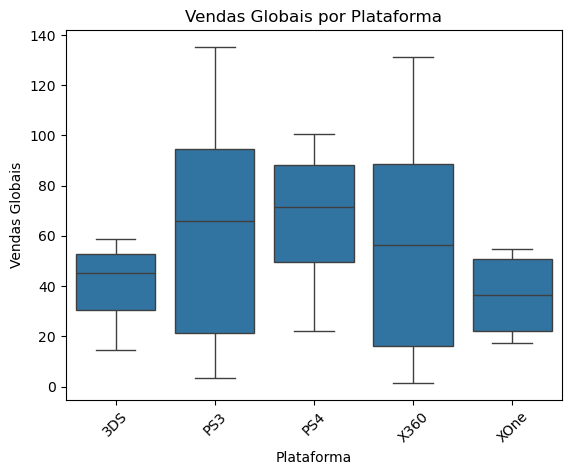

In [37]:

#Criar o boxplot
sns.boxplot(x='platform', y='total_sales', data=df_grouped)

plt.title('Vendas Globais por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais')

# exibir o gráfico
plt.xticks(rotation=45)
plt.show()

As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.

Sim as plataformas PS3 e X360 tem uma quantidade muito maior de vendas no periodo.

A media das plataformas XOne e 3DS se mostram bem a baixo das demais.

Apesar do XOne e do PS4 terem vendas no mesmo periodo a quantidade de vendas do PS4 foi bem maior .



In [38]:
df_XOne = df_above[df_above['platform']=='XOne'].copy()
df_XOne['user_score_adjusted'] = df_XOne['user_score'] * 10

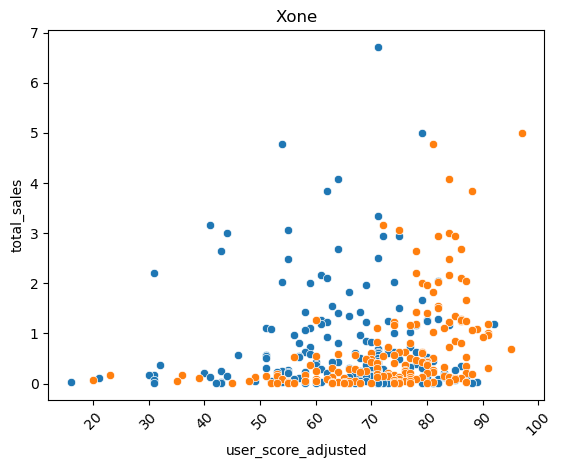

In [39]:
#Criar grafico de dispersão
sns.scatterplot(x='user_score_adjusted', y='total_sales', data=df_XOne)
sns.scatterplot(x='critic_score', y='total_sales', data=df_XOne)
# exibir o gráfico
plt.xticks(rotation=45)
plt.title('Xone')
plt.show()

Quanto maior o score tanto de usuarios quanto criticos maior a quantidade de vendas

In [40]:
df_PS4 = df_above[df_above['platform']=='PS4'].copy()

df_PS4['user_score_adjusted'] = df_PS4['user_score'] * 10

df_PS3 = df_above[df_above['platform']=='PS3'].copy()

df_PS3['user_score_adjusted'] = df_PS3['user_score'] * 10

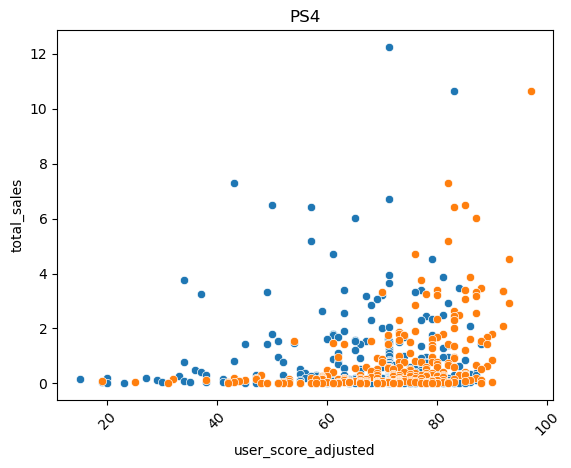

In [41]:
#Criar grafico de dispersão
sns.scatterplot(x='user_score_adjusted', y='total_sales', data=df_PS4)
sns.scatterplot(x='critic_score', y='total_sales', data=df_PS4)
# exibir o gráfico
plt.xticks(rotation=45)
plt.title('PS4')
plt.show()

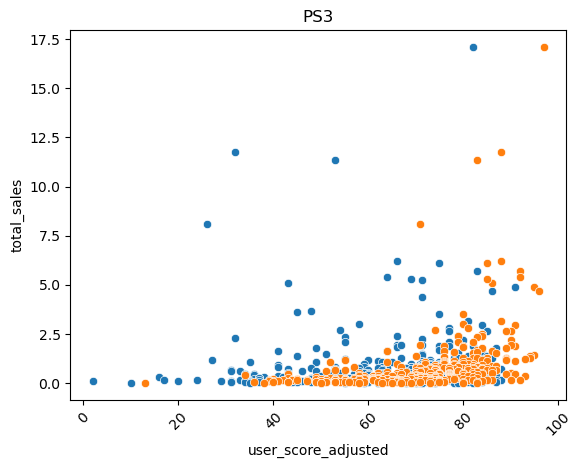

In [42]:
#Criar grafico de dispersão
sns.scatterplot(x='user_score_adjusted', y='total_sales', data=df_PS3)
sns.scatterplot(x='critic_score', y='total_sales', data=df_PS3)
# exibir o gráfico
plt.xticks(rotation=45)
plt.title('PS3')
plt.show()

O padrão se repere para outras plataformas

In [43]:
x=df[['genre','total_sales','critic_score','user_score']].groupby('genre').sum().sort_values(by='total_sales',ascending=False)
print(x)

              total_sales  critic_score    user_score
genre                                                
Action            1559.57      125929.0  23874.345968
Sports            1196.76       85930.0  16548.882411
Shooter            948.34       66251.0   9349.593399
Role-Playing       874.93       53545.0  11040.709816
Platform           776.68       33825.0   6402.521212
Misc               728.12       34842.0  12334.635455
Racing             652.57       50429.0   8842.228037
Fighting           411.17       28310.0   6119.970751
Simulation         359.24       24154.0   6223.449394
Puzzle             230.19       15103.0   4138.920843
Adventure          221.10       21102.0   9286.321252
Strategy           163.38       21770.0   4919.317154


In [44]:
pearson_corr_scipy, _ = st.pearsonr(x['total_sales'], x['critic_score'])
print(f"Coeficiente de correlação: {pearson_corr_scipy}")
pearson_corr_scipy, _ = st.pearsonr(x['total_sales'], x['user_score'])
print(f"Coeficiente de correlação: {pearson_corr_scipy}")

Coeficiente de correlação: 0.948352076025337
Coeficiente de correlação: 0.879292423959734


Podemos notar que a um correlação entre o numero de vendas e os ratings, quanto maior os ratings maior o numero de vendas podemos notar isso tanto com as plataformas quanto com os generos mais vendidos

Ao calcular a correlação podemos notar que ambas são corelações fortes e positivas, o que implica que ao uma aumentar a outra também aumenta

Os generos com o maior numero de vendas também são os que tem o maior score entre os criticos e os usuarios

          na_sales                                             rating
platform                                                             
X360        602.47  EMMMMMMMMMMMMMMMMMME10+MMEMMEMMTETMMMEMMEME10+...
PS2         583.84  MMEMETEETEMTETETTTTETEEEMTETE10+MEEEMETE10+TTE...
Wii         496.90  EEEEEEETEE10+E10+EEEE10+TE10+EEE10+TETE10+EE10...
PS3         393.49  MMMMEMMMEMTMTMEMMMMEMTMTMETMMMMETMETMTE10+MEME...
DS          382.40  EEEEEEEEE10+EEEEE10+EEEE10+EE10+E10+EEEEE10+EE...
['X360' 'PS2' 'Wii' 'PS3' 'DS']
          na_sales
genre             
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
['Action' 'Sports' 'Shooter' 'Platform' 'Misc']


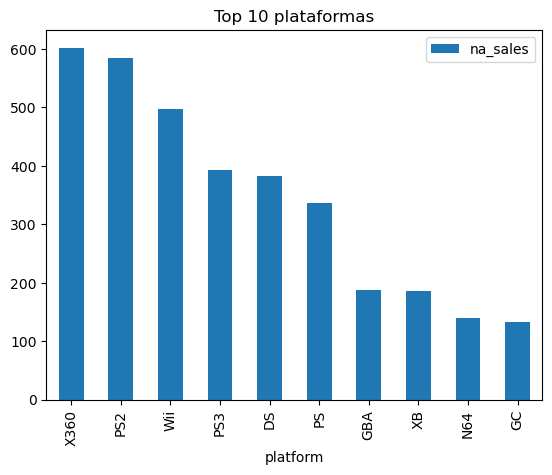

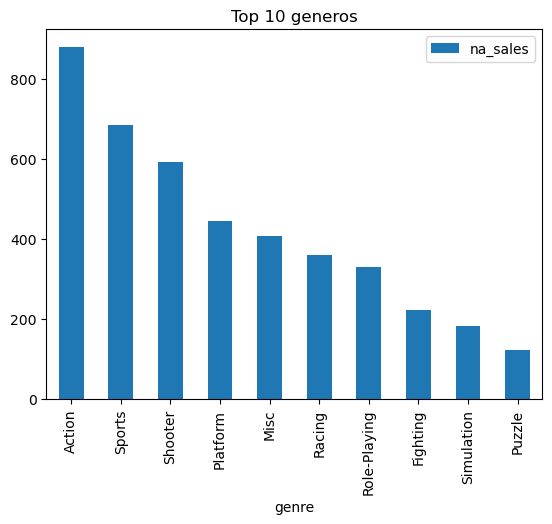

In [45]:
na_p = df[['platform','na_sales','rating']].groupby(['platform']).sum().sort_values(by='na_sales',ascending=False)
print(na_p.head(5))
print(na_p.head(5).index.to_numpy())

na_g=df[['genre','na_sales']].groupby(['genre']).sum().sort_values(by='na_sales',ascending=False)
print(na_g.head(5))
print(na_g.head(5).index.to_numpy())

na_p.head(10).plot(kind='bar')
plt.title("Top 10 plataformas")
na_g.head(10).plot(kind='bar')
plt.title("Top 10 generos")

plt.show()

          eu_sales
platform          
PS2         339.29
PS3         330.29
X360        270.76
Wii         262.21
PS          213.61
['PS2' 'PS3' 'X360' 'Wii' 'PS']
         eu_sales
genre            
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
['Action' 'Sports' 'Shooter' 'Racing' 'Misc']


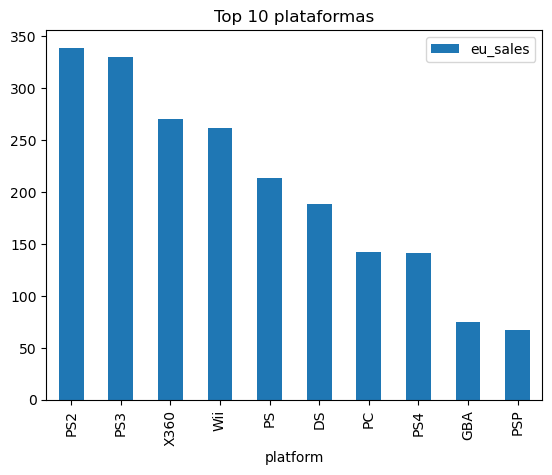

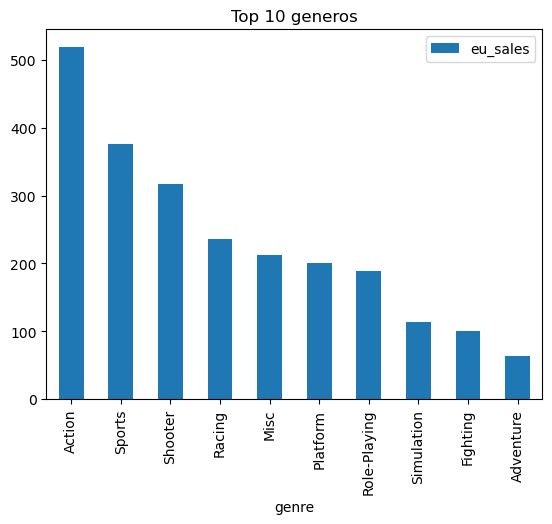

In [46]:
eu_p = df[['platform','eu_sales']].groupby(['platform']).sum().sort_values(by='eu_sales',ascending=False)
print(eu_p.head(5))
print(eu_p.head(5).index.to_numpy())

eu_g  = df[['genre','eu_sales']].groupby(['genre']).sum().sort_values(by='eu_sales',ascending=False)
print(eu_g.head(5))
print(eu_g.head(5).index.to_numpy())
eu_p.head(10).plot(kind='bar')
plt.title("Top 10 plataformas")
eu_g.head(10).plot(kind='bar')
plt.title("Top 10 generos")

plt.show()

          jp_sales
platform          
DS          175.57
PS          139.82
PS2         139.20
SNES        116.55
3DS         100.67
['DS' 'PS' 'PS2' 'SNES' '3DS']
              jp_sales
genre                 
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
['Role-Playing' 'Action' 'Sports' 'Platform' 'Misc']


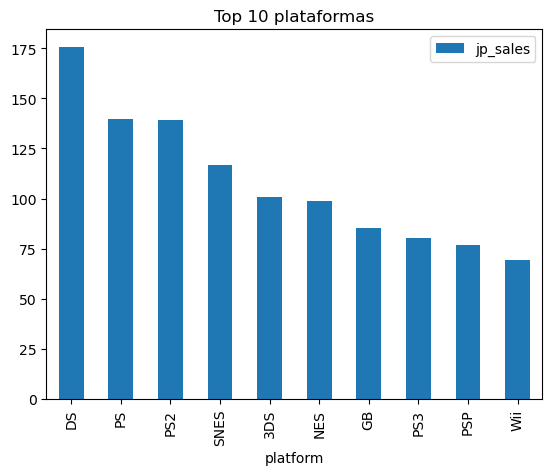

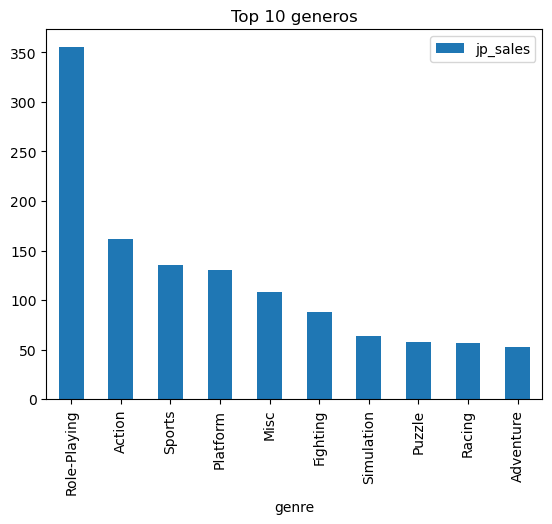

In [47]:
jp_p = df[['platform','jp_sales']].groupby(['platform']).sum().sort_values(by='jp_sales',ascending=False)
print(jp_p.head(5))
print(jp_p.head(5).index.to_numpy())

jp_g = df[['genre','jp_sales']].groupby(['genre']).sum().sort_values(by='jp_sales',ascending=False)
print(jp_g.head(5))
print(jp_g.head(5).index.to_numpy())

jp_p.head(10).plot(kind="bar")
plt.title("Top 10 plataformas")

jp_g.head(10).plot(kind="bar")
plt.title("Top 10 generos")

plt.show()


As plataformas com maior numero de vendas em NA foram: 
X360, PS2, Wii, PS3, DS

Os generos com maior numero de vendas foram:
Action, Sports, Shooter, Platform, Misc

As plataformas com maior numero de vendas em EU foram: 
PS2, PS3, X360, Wii, PS

Os generos com maior numero de vendas foram:
Action, Sports, Shooter, Racing, Misc

As plataformas com maior numero de vendas em JP foram: 
DS, PS, PS2, SNES, 3DS

Os generos com maior numero de vendas foram:
Role-Playing, Action, Sports, Platform, Misc

O grande difenrencial vem do japão com a primeira posição nos generos mais jogados sendo Role-Playing

        na_sales  eu_sales  jp_sales
rating                              
AO          1.26      0.61      0.00
E        1292.99    710.25    198.11
E10+      353.32    188.52     40.20
EC          1.53      0.11      0.00
K-A         2.56      0.27      1.46
M         748.48    483.97     64.24
RP          0.00      0.08      0.00
T         759.75    427.03    151.40


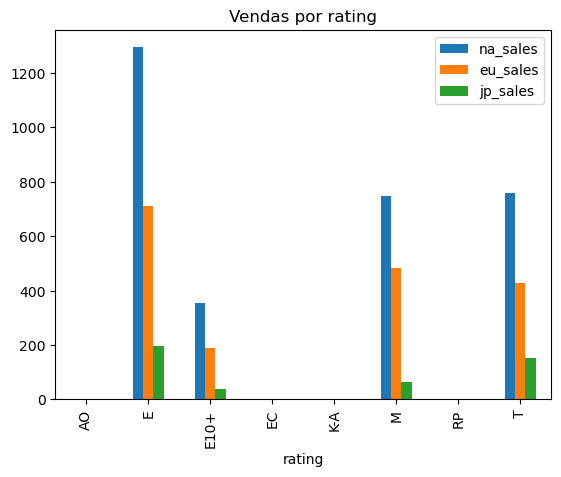

In [48]:
na_eu_jp_rating = df[['rating','na_sales','eu_sales','jp_sales']].groupby('rating').sum()
print(na_eu_jp_rating)
na_eu_jp_rating.plot(kind='bar')
plt.title('Vendas por rating')
plt.show()

Os ratings afetam as vendas
Na o rating RP tem 0 vendas e os EC, K-A, AO apresentam bem menos vendas do que os demais

EU os ratings AO, EC, K-A e RP apresentam vendas bem menores do que os demais

Jp os ratings AO, EC e RP tem um total de 0 vendas


### teste de hipoteses

HIpotese nula: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

Hipotese alternativa: elas não são as memas

In [49]:
cla_xone = df[df['platform']=='XOne'][['user_score']]
cla_pc = df[df['platform']=='PC'][['user_score']]

alpha = 0.05 

results = st.ttest_ind(cla_xone, cla_pc)

print('valor-p:', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p: [3.32964826e-05]
Rejeitamos a hipótese nula


Hipotese nula: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

Hipotese alternativa: não são diferentes

In [50]:
act = df[df['genre']=='Action'][['user_score']]
spo = df[df['genre']=='Sports'][['user_score']]

res = st.ttest_ind(act,spo)
print(res.pvalue)

if res.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

[0.18372589]
Não podemos rejeitar a hipótese nula


### Conclusão

É possivel verificar um maior peso de vendas baseados em algumas caracteristicas como genero, rating, plataforma e tambem podemos identificar diferentes comportamentos regionais, onde cada região demonstra maior interesse por derminados generos e plataf